## Gráficos População

#### Plots: DF_População_Municipios

Selecionando e alterando colunas

In [ ]:
# Filtrando df e montando pop_growth_df para gráfico
df = DF_População_Municipios[['nome_municipio','População 2000', 'População 2010', 'População 2020', 'Cor', 'Sexo', 'Situação de Domicílio']]
pop_growth_df = df[(df['Cor'] == 'Total Cor') & (df['Sexo'] == 'Total Sexo') & (df['Situação de Domicílio'] == 'Total Situação de Domicílio') ]
pop_growth_df.drop(['Cor', 'Sexo', 'Situação de Domicílio'], axis = 1, inplace = True )


C:\Users\João Flavio\AppData\Local\Temp\ipykernel_20200\794555480.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pop_growth_df.drop(['Cor', 'Sexo', 'Situação de Domicílio'], axis = 1, inplace = True )


In [ ]:
# Adicionando colunas com acréscimo populacional para cada ano para criar bar chart empilhado proporcional
pop_growth_df['Acresc_Pop_2010'] = pop_growth_df.apply(lambda row: row['População 2010'] - row['População 2000'], axis = 1)
pop_growth_df['Acresc_Pop_2020'] = pop_growth_df.apply(lambda row: row['População 2020'] - row['População 2010'], axis = 1)


C:\Users\João Flavio\AppData\Local\Temp\ipykernel_20200\1300409317.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pop_growth_df['Acresc_Pop_2010'] = pop_growth_df.apply(lambda row: row['População 2010'] - row['População 2000'], axis = 1)
C:\Users\João Flavio\AppData\Local\Temp\ipykernel_20200\1300409317.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pop_growth_df['Acresc_Pop_2020'] = pop_growth_df.apply(lambda row: row['População 2020'] - row['População 2010'], axis = 1)


Gráfico Comparado Total Populacional e Acréscimo Populacional

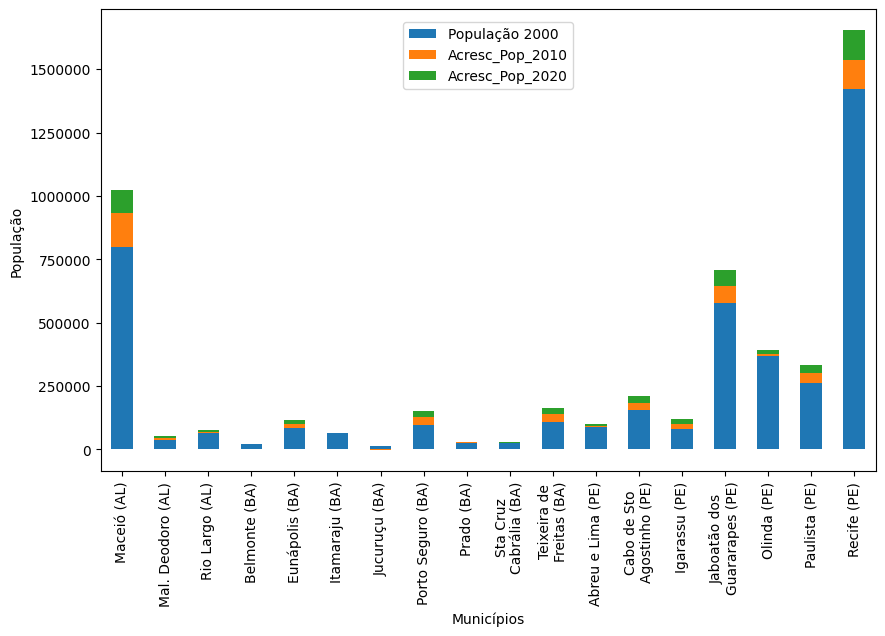

In [ ]:
# Criando bar chart empilhado com total populacional e acréscimo populacional agregado por municipios de um estado

ax = pop_growth_df.plot(x="nome_municipio", y=["População 2000", "Acresc_Pop_2010", "Acresc_Pop_2020"], kind="bar", rot=0, stacked=True)

# set the tick labels using the new labels dictionary
ax.set_xticklabels([X_labels.get(label.get_text(), label.get_text()) for label in ax.get_xticklabels()])

_ = ax.legend(bbox_to_anchor=(.5,.9), loc='center')
_ = plt.xticks(rotation=90)
plt.ticklabel_format(style='plain', axis='y')
plt.ylabel('População')
plt.xlabel('Municípios')

save_graph('Bar_Tamanho e Crescimento Populacional','Municipios')

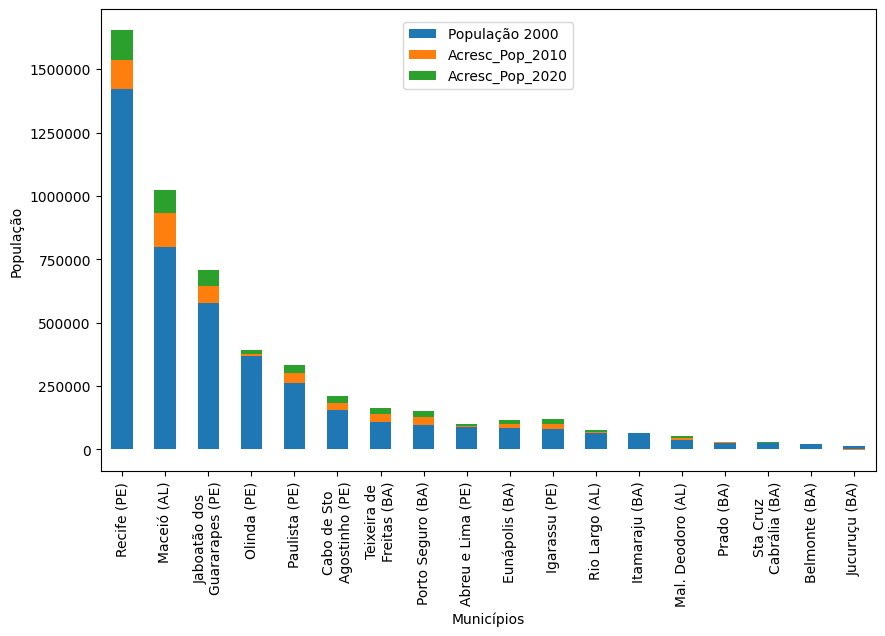

In [ ]:
# Criando bar chart empilhado com total populacional e acréscimo populacional em ordem decrescente

sorted_df = pop_growth_df.sort_values('População 2000', ascending=False)

ax = sorted_df.plot(x="nome_municipio", y=["População 2000", "Acresc_Pop_2010", "Acresc_Pop_2020"], kind="bar", rot=0, stacked=True)

ax.set_xticklabels([X_labels.get(label.get_text(), label.get_text()) for label in ax.get_xticklabels()])

_ = ax.legend(bbox_to_anchor=(.5,.9), loc='center')
_ = plt.xticks(rotation=90)
plt.ticklabel_format(style='plain', axis='y')
plt.ylabel('População')
plt.xlabel('Municípios')

save_graph('Bar_Tamanho e Cresc Popluacional Ordenado', 'Municipios')

#### Plots: DF_População_Municipios

Gráficos Pizza Perfil População: Sexo (O.K.)

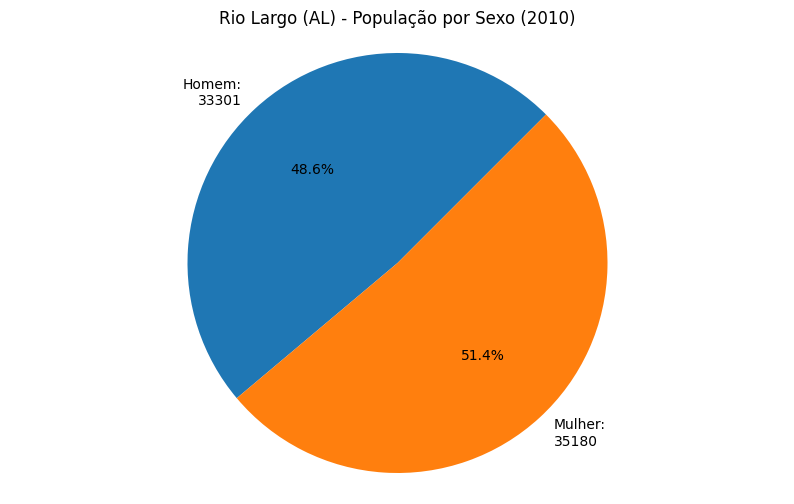

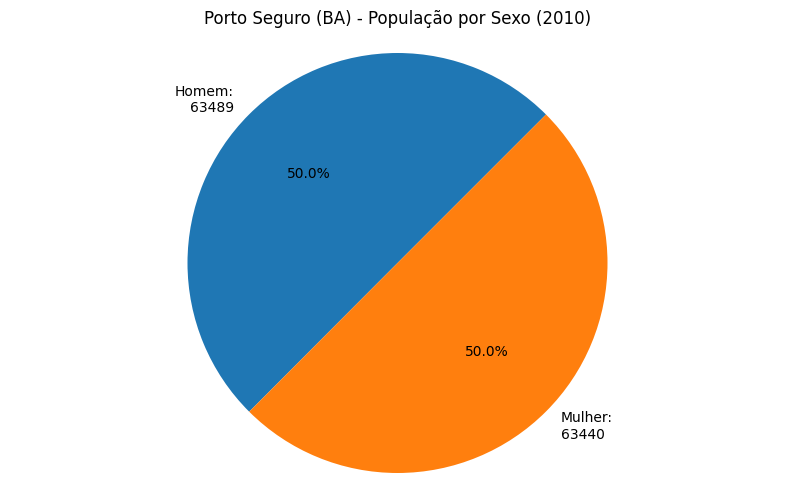

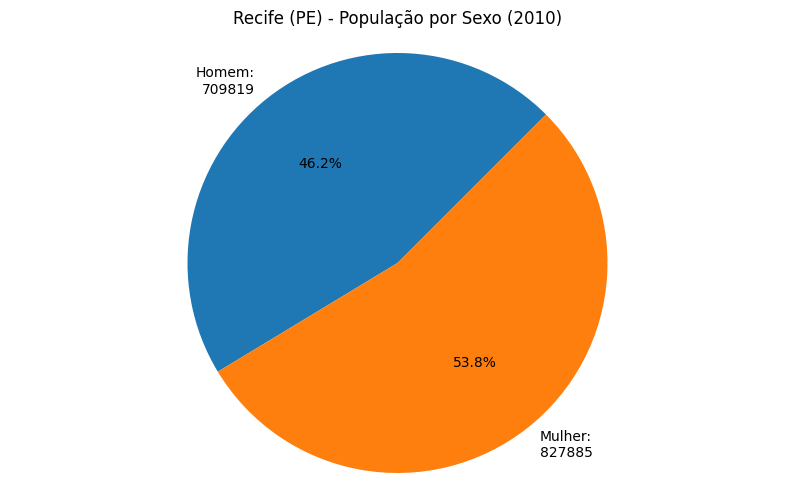

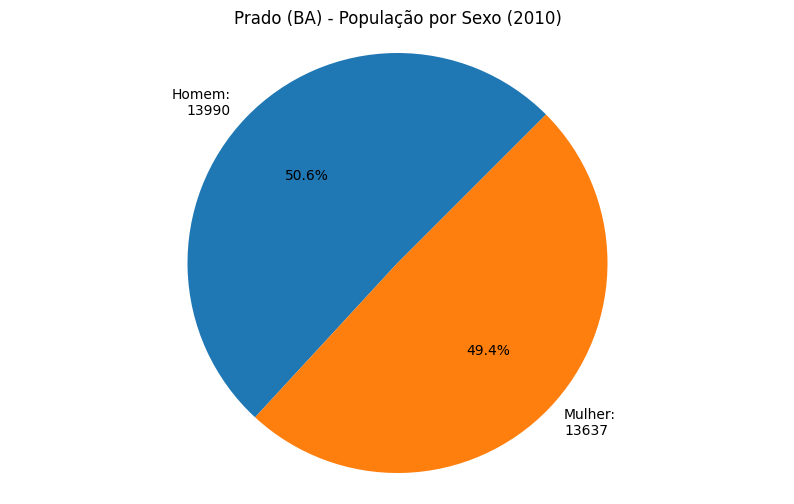

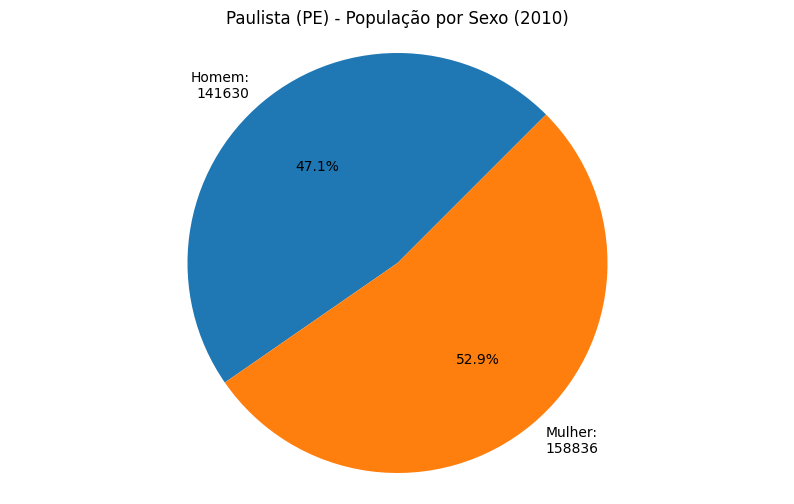

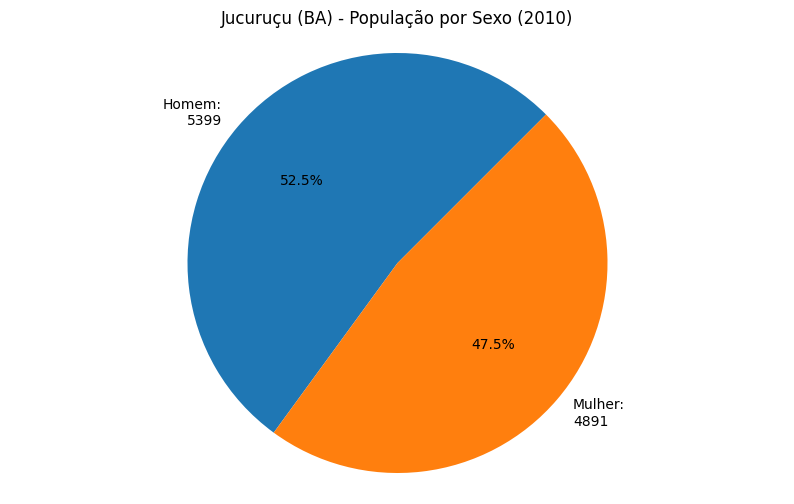

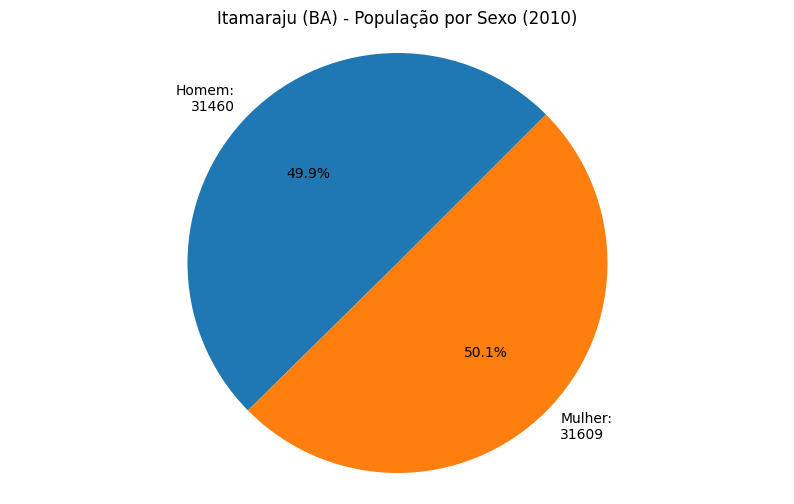

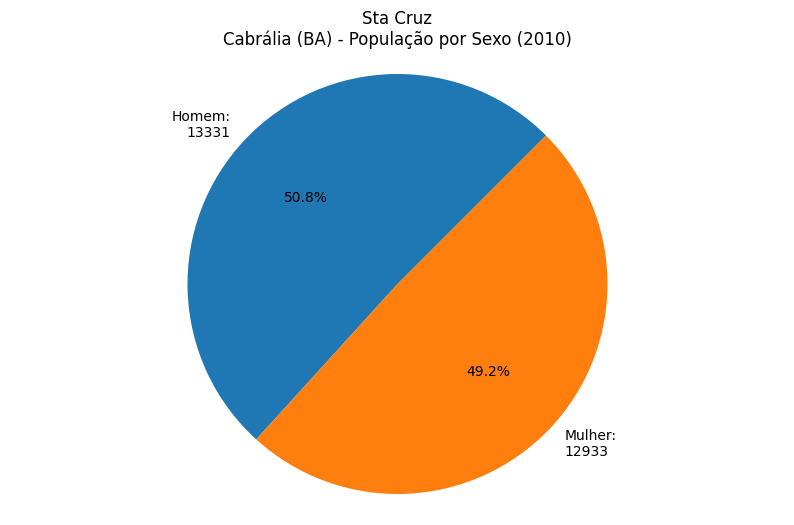

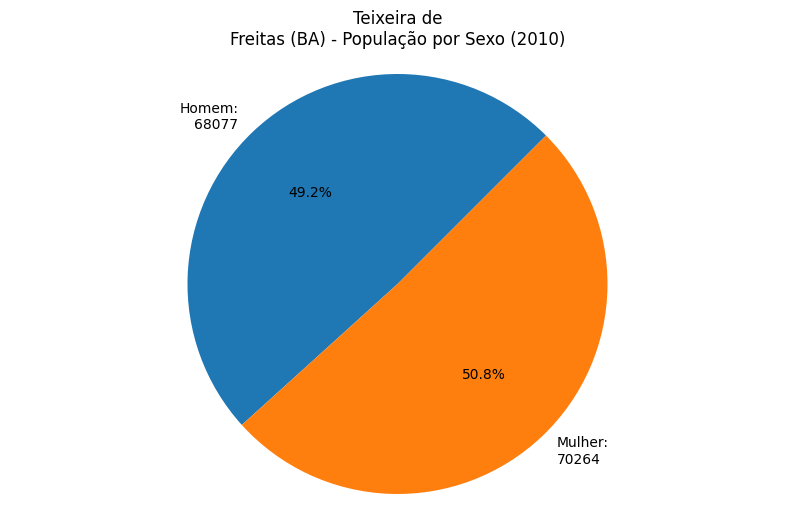

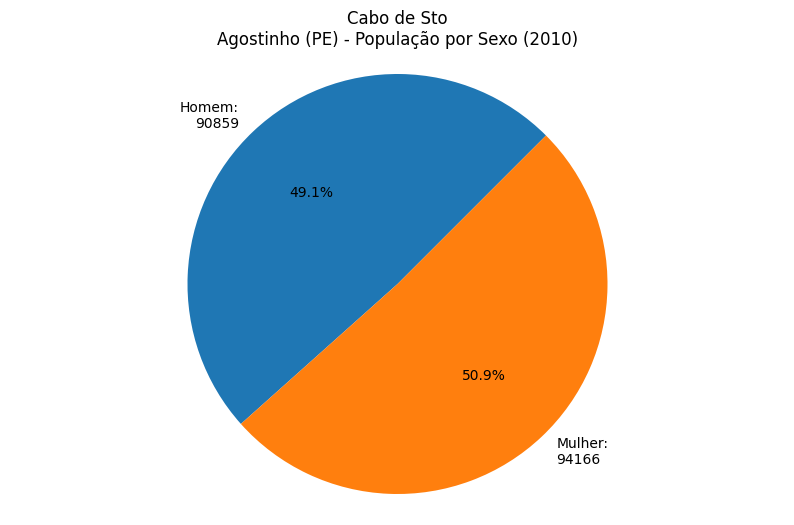

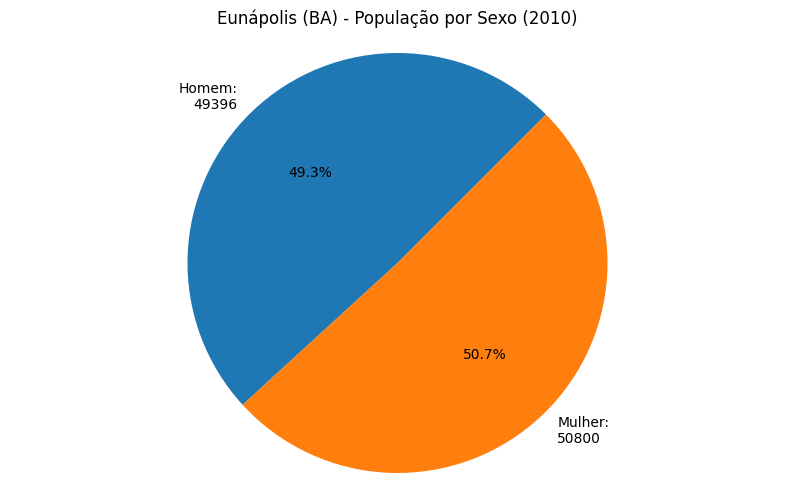

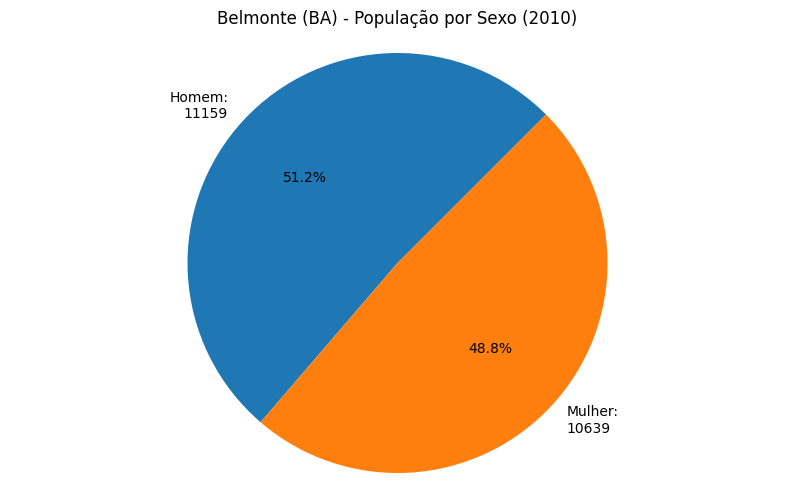

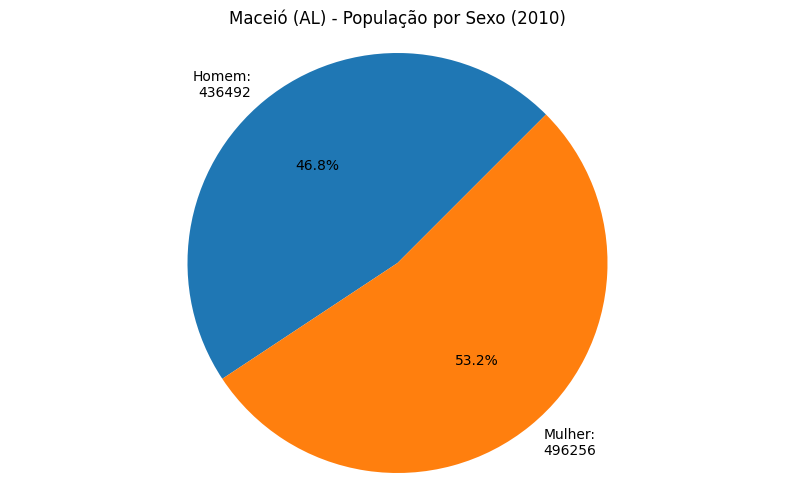

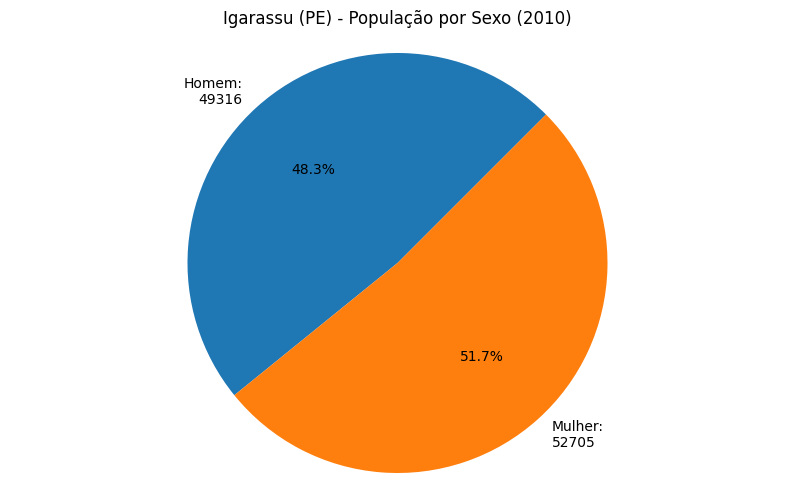

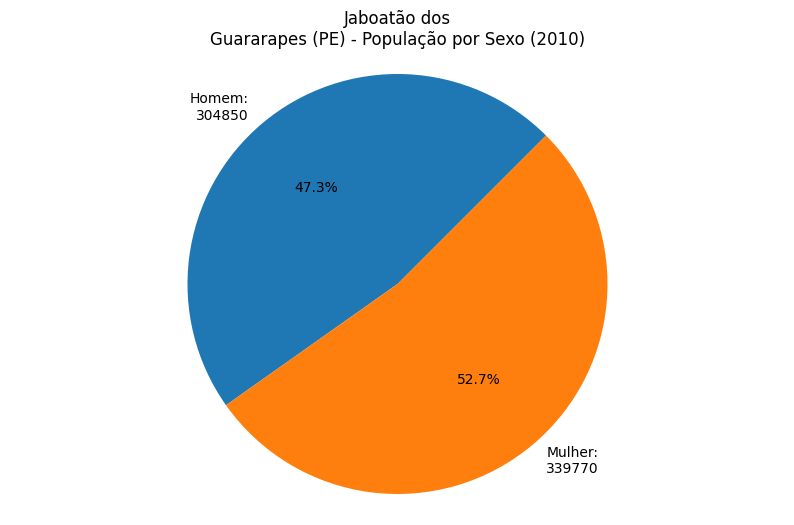

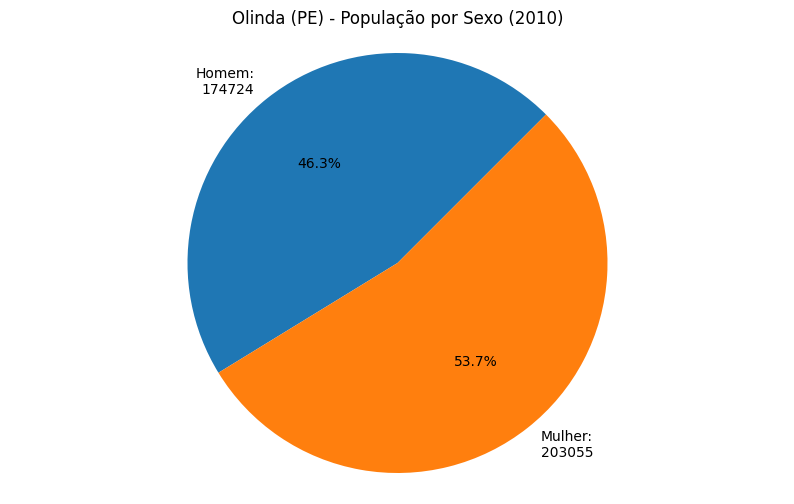

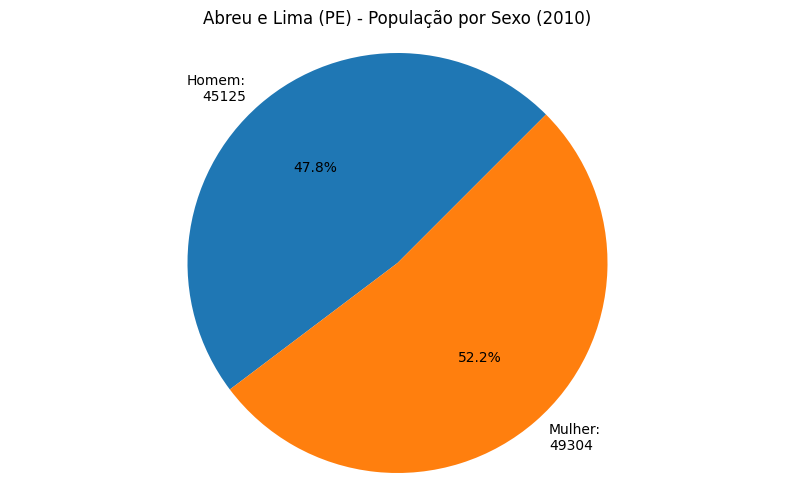

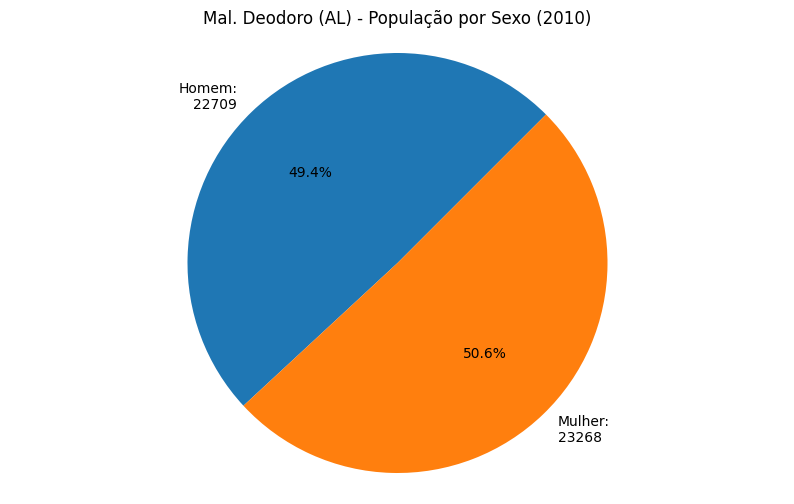

In [ ]:
# Filtrando df e montando pop_sexo_df para gráfico
df = DF_População_Municipios[[
                             'nome_municipio',
                             'Cor', 'Sexo', 'Situação de Domicílio',
                             'População 2010'
                              ]]

df = df[(df['Cor'] == 'Total Cor') & (df['Situação de Domicílio'] == 'Total Situação de Domicílio') & ((df['Sexo'] == 'Mulher') | (df['Sexo'] == 'Homem'))  ]
df.drop(['Cor', 'Situação de Domicílio'], axis = 1, inplace = True )

# replace the values in the 'nome_municipio' column
df['nome_municipio'] = df['nome_municipio'].replace(X_labels)

df['População 2010'] = df['População 2010'].apply(lambda x: pd.to_numeric(x, errors='coerce'))

# Loop de criação dos pie charts para pop_sexo_df
set_munic = set(df['nome_municipio'].tolist())


for municipio in set_munic:
    pop_sexo_df = df[df['nome_municipio'] == municipio].pivot(index='nome_municipio', columns='Sexo', values='População 2010')
    
    homem_pop = pop_sexo_df['Homem'][0]
    mulher_pop = pop_sexo_df['Mulher'][0]
    
    labels = [f'Homem:\n{pop_sexo_df["Homem"][0]}', f'Mulher:\n{pop_sexo_df["Mulher"][0]}']
    sizes = [homem_pop, mulher_pop]
    
    fig1, ax1 = plt.subplots()
    ax1.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=45)
    ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.title(f"{municipio} - População por Sexo (2010)")
    
    save_graph('Pie_Pop por Sexo 2010', municipio)

    plt.show()


Gráficos Pizza Perfil População: Cor (O.K)

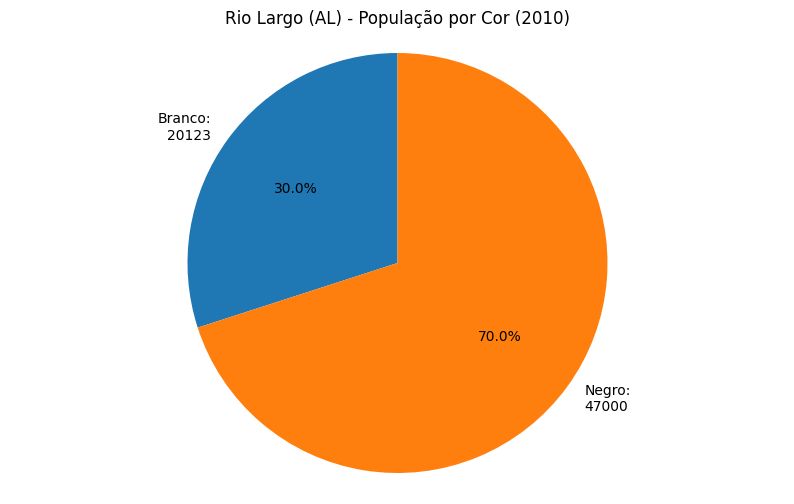

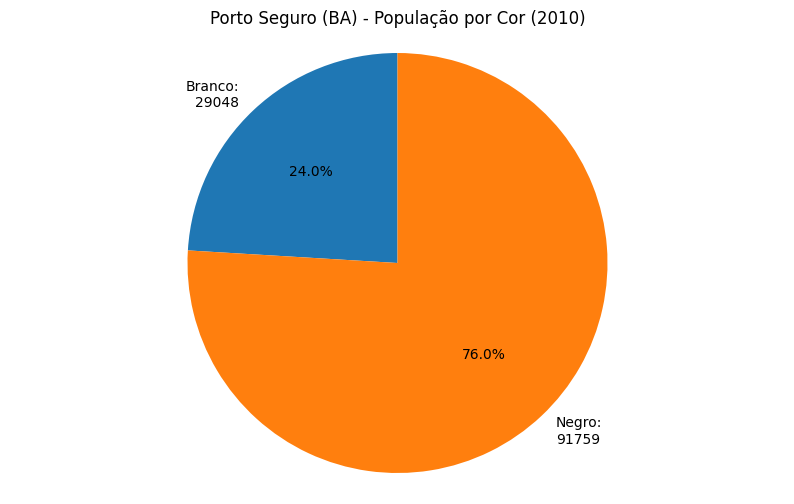

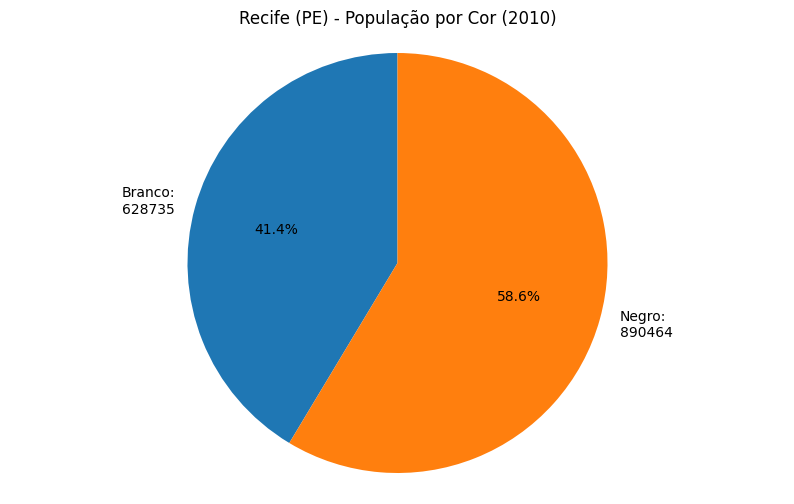

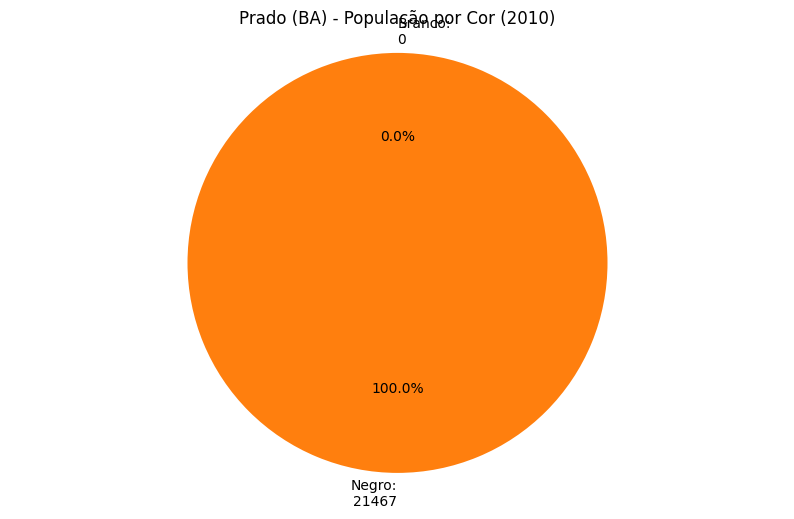

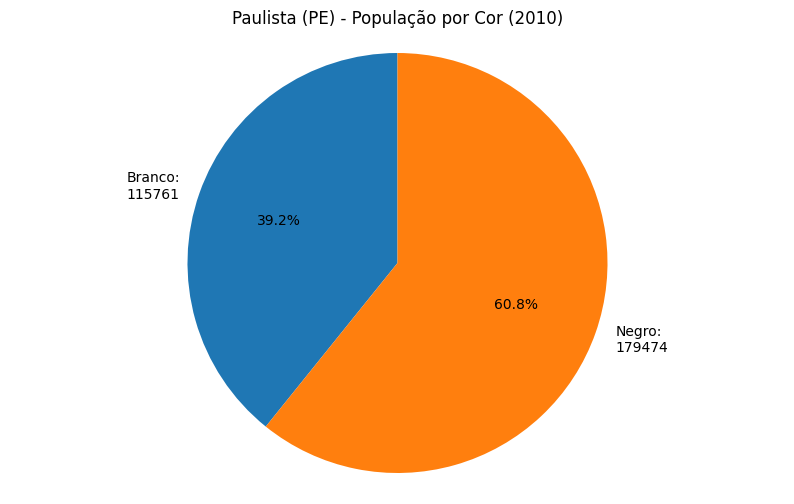

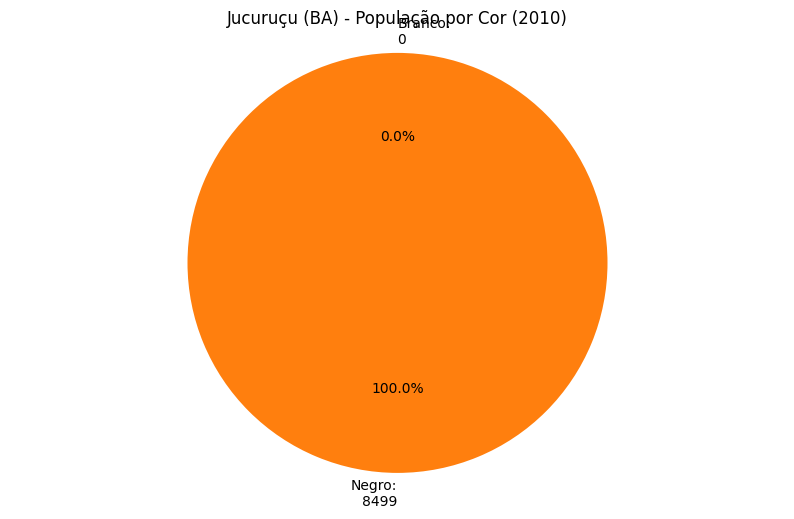

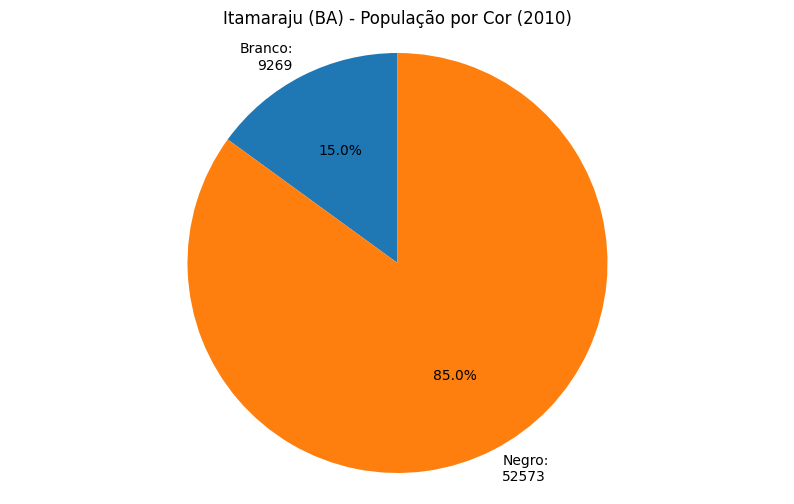

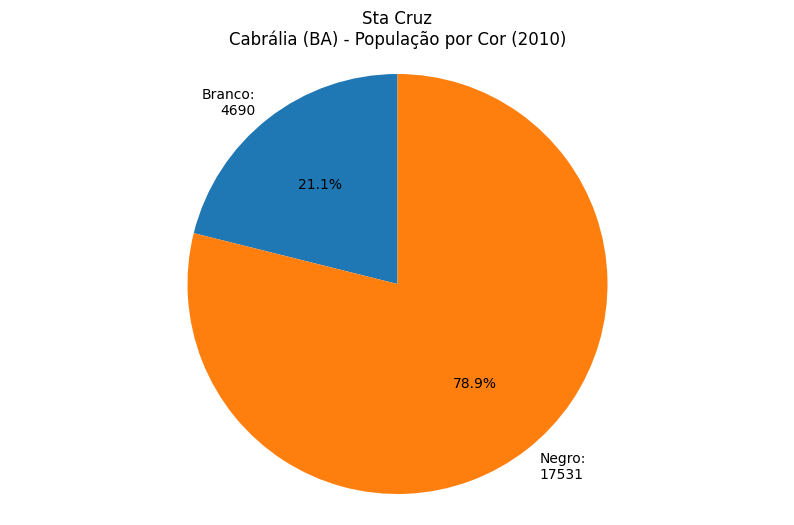

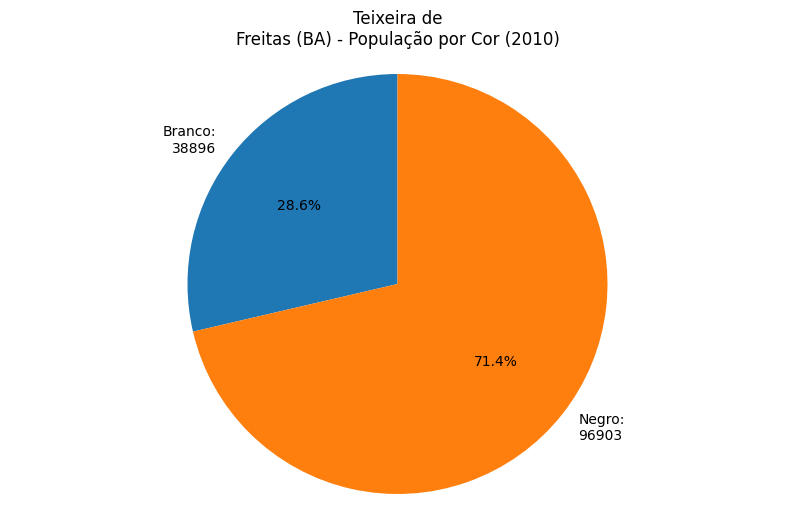

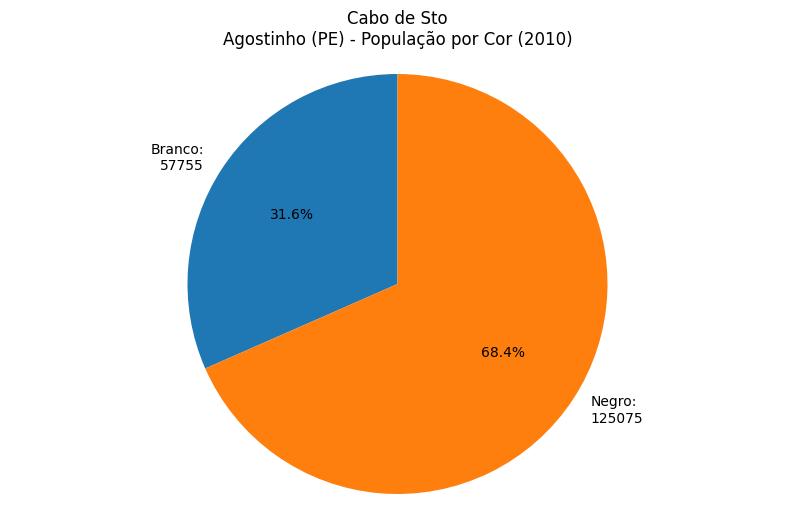

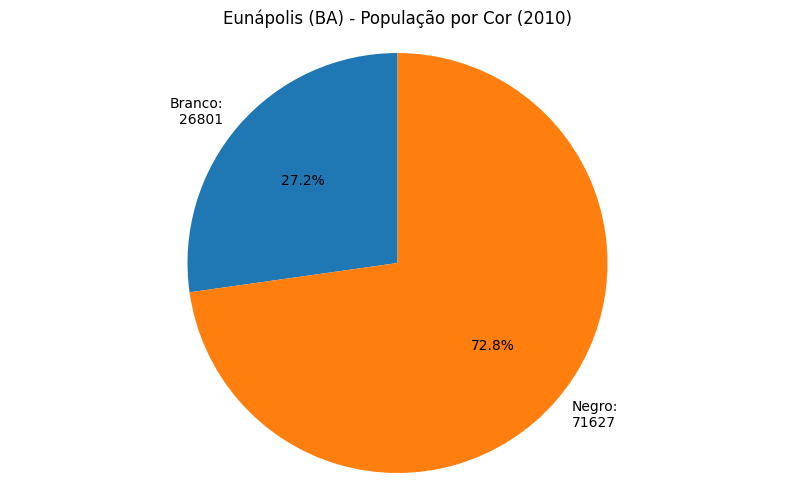

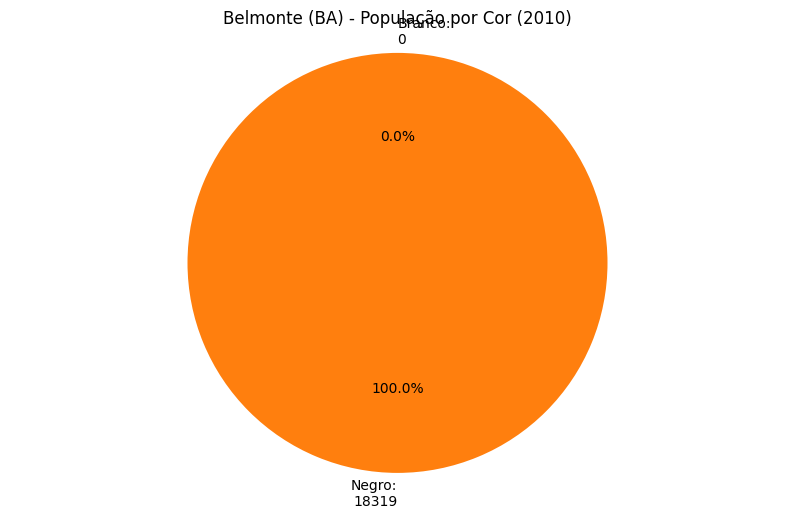

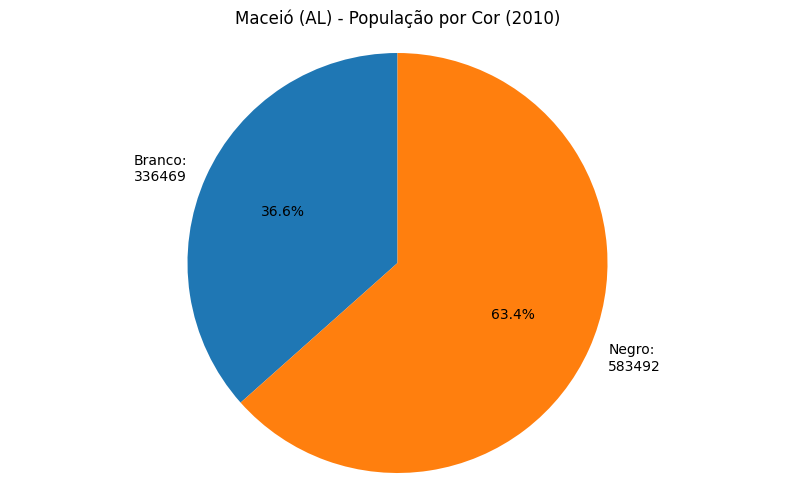

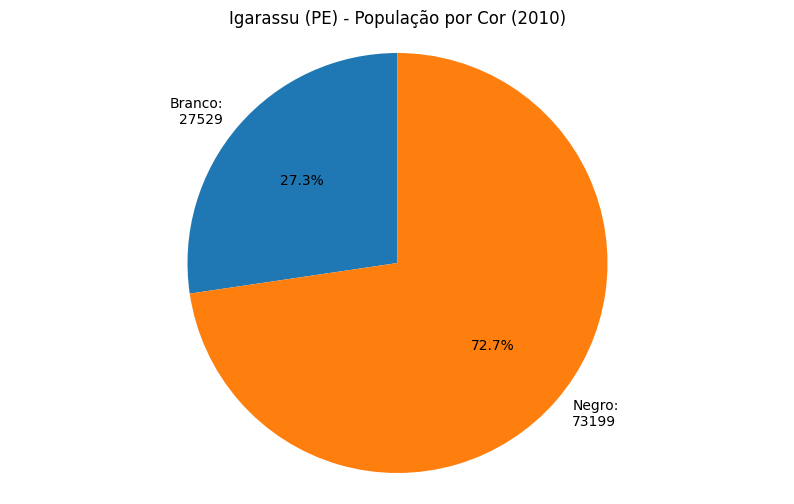

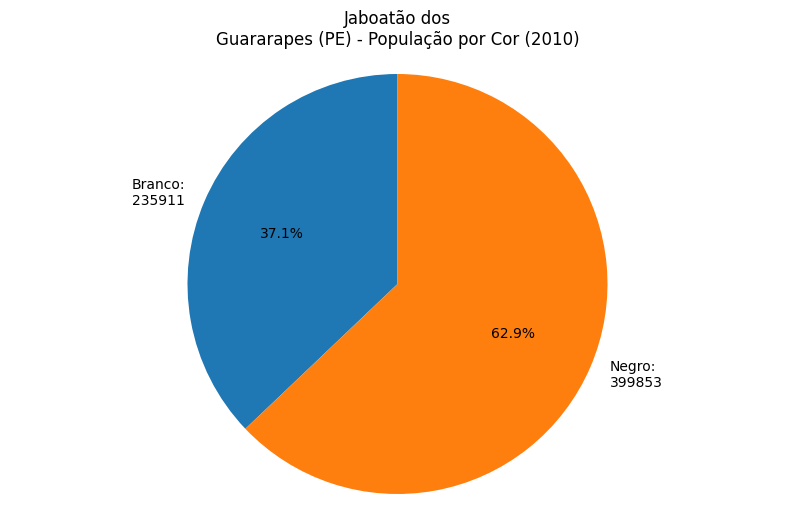

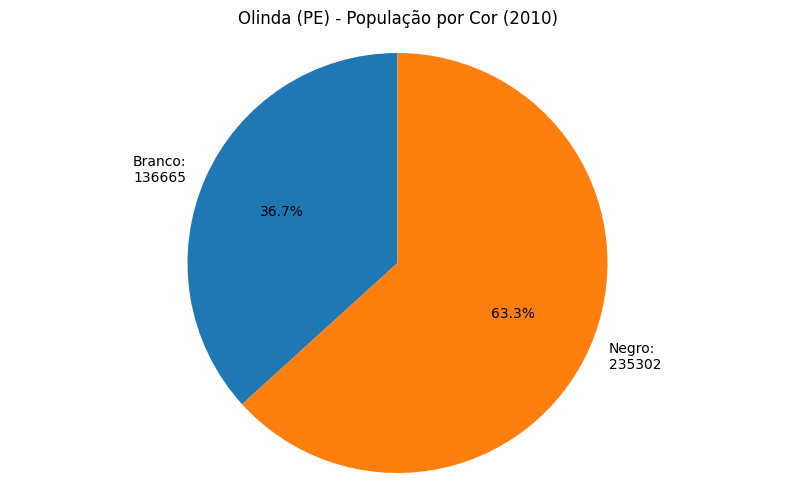

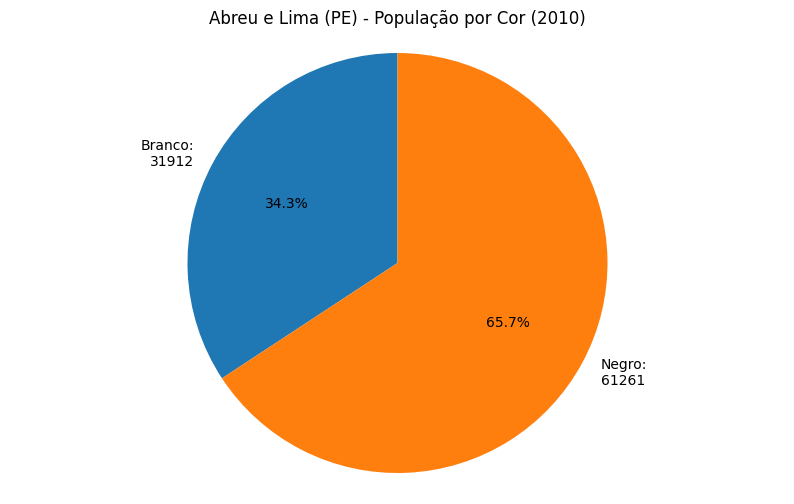

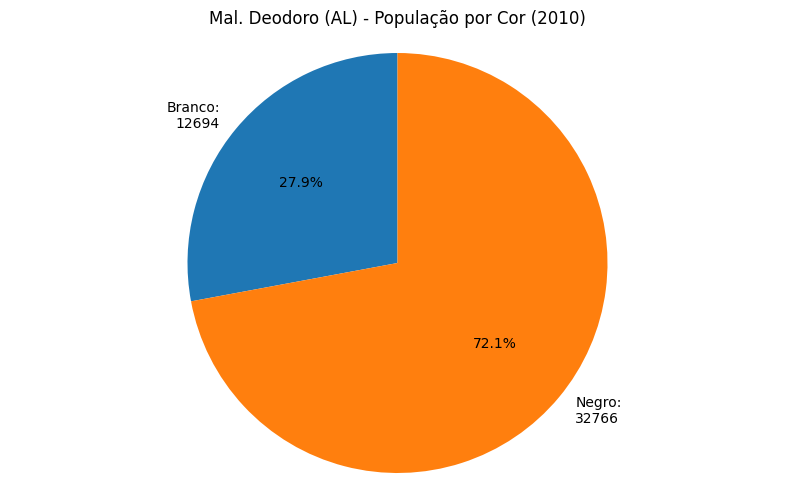

In [ ]:
# Filtrando df e montando pop_cor_df para gráfico
df = DF_População_Municipios[[
                             'nome_municipio',
                             'Cor', 'Sexo', 'Situação de Domicílio',
                             'População 2010'
                              ]]

df = df[(df['Sexo'] == 'Total Sexo') & (df['Situação de Domicílio'] == 'Total Situação de Domicílio') & ((df['Cor'] == 'Negro') | (df['Cor'] == 'Branco'))  ]
df.drop(['Sexo', 'Situação de Domicílio'], axis = 1, inplace = True )
df['População 2010'] = df['População 2010'].replace('-', 0)

# replace the values in the 'nome_municipio' column
df['nome_municipio'] = df['nome_municipio'].replace(X_labels)
# Transforma object em int dtype
df['População 2010'] = df['População 2010'].apply(lambda x: pd.to_numeric(x, errors='coerce'))

# Loop de criação dos pie charts para pop_cor_df
set_munic = set(df['nome_municipio'].tolist())

for municipio in set_munic:
    pop_sexo_df = df[df['nome_municipio'] == municipio].pivot(index='nome_municipio', columns='Cor', values='População 2010')
    
    homem_pop = pop_sexo_df['Branco'][0]
    mulher_pop = pop_sexo_df['Negro'][0]
    
    labels = [f'Branco:\n{pop_sexo_df["Branco"][0]}', f'Negro:\n{pop_sexo_df["Negro"][0]}']
    sizes = [homem_pop, mulher_pop]
    
    fig1, ax1 = plt.subplots()
    ax1.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
    ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.title(f"{municipio} - População por Cor (2010)")
    
    save_graph('Pie_Pop por Cor 2010', municipio)

    plt.show()

Gráficos Pizza Perfil População: Situação Domiciliar (O.K.)

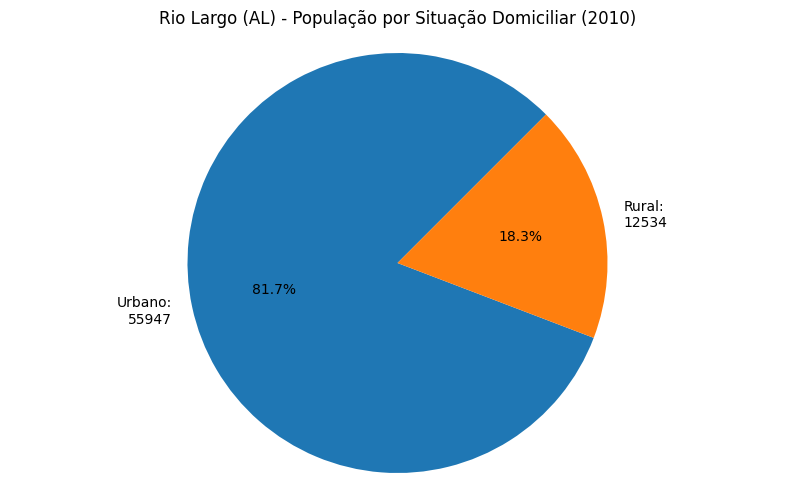

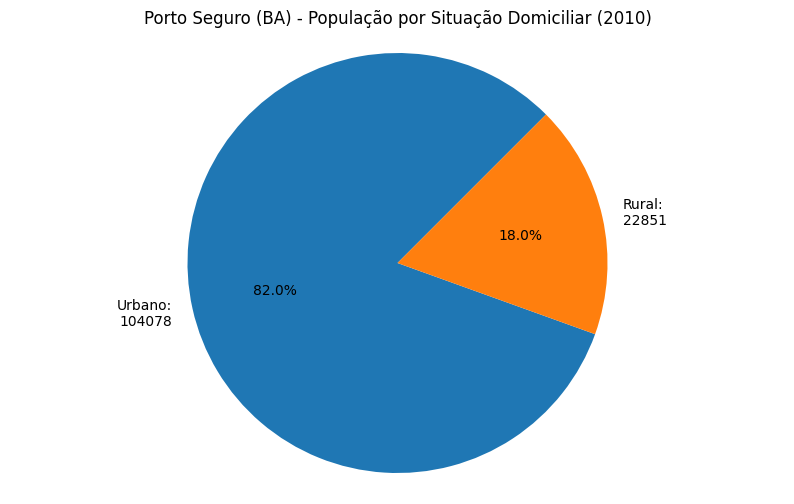

Recife (PE) pie chart failed. Added to Errors_list


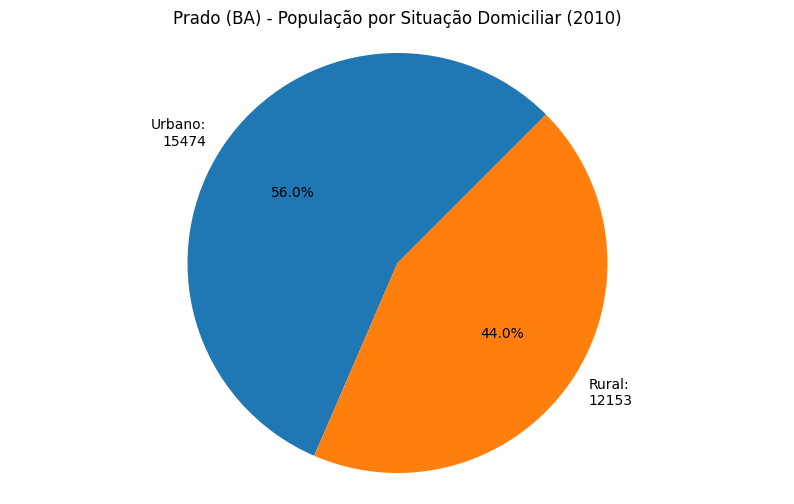

Paulista (PE) pie chart failed. Added to Errors_list


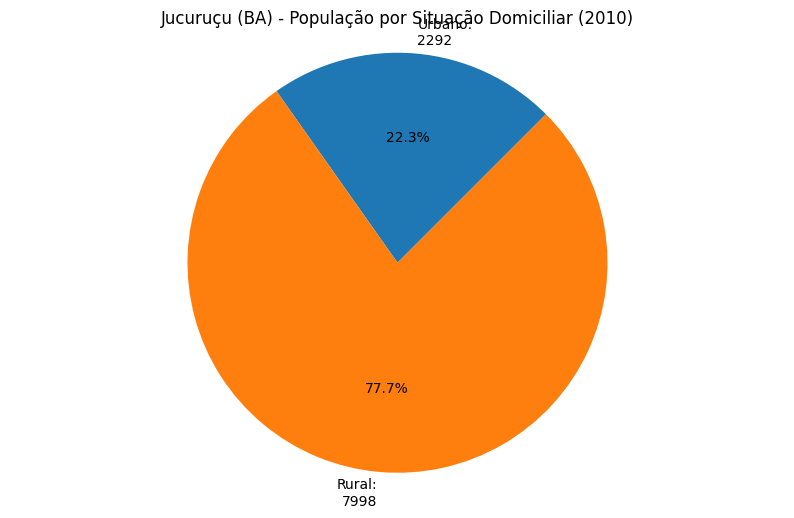

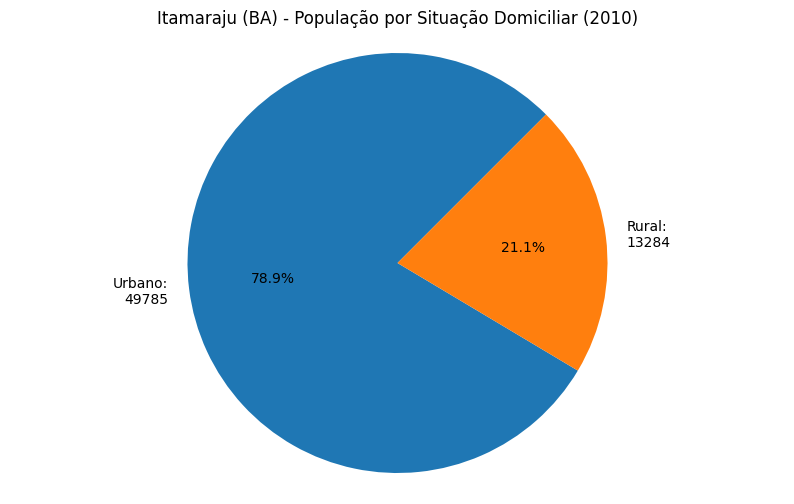

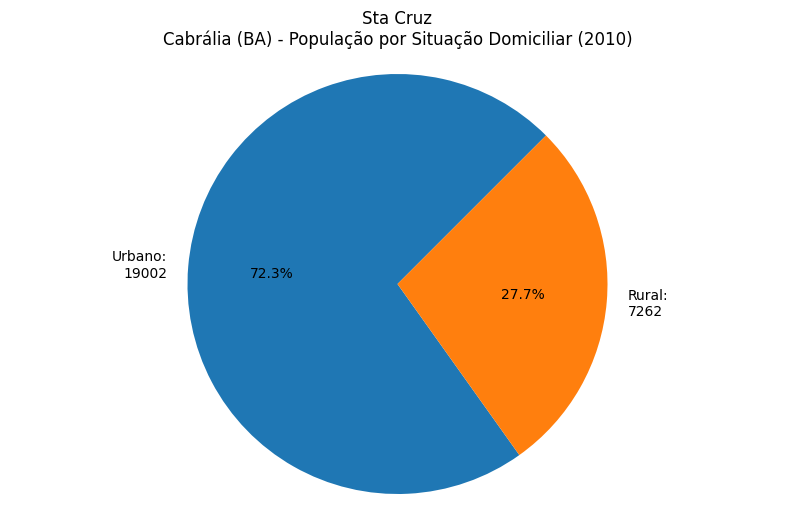

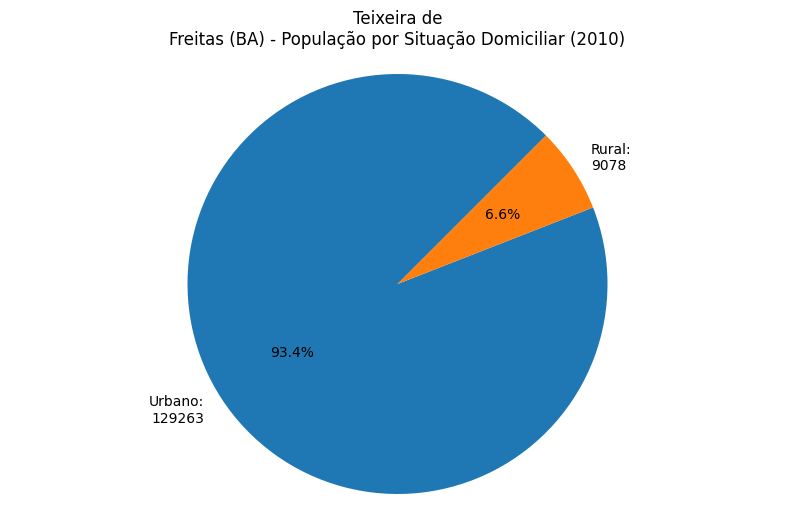

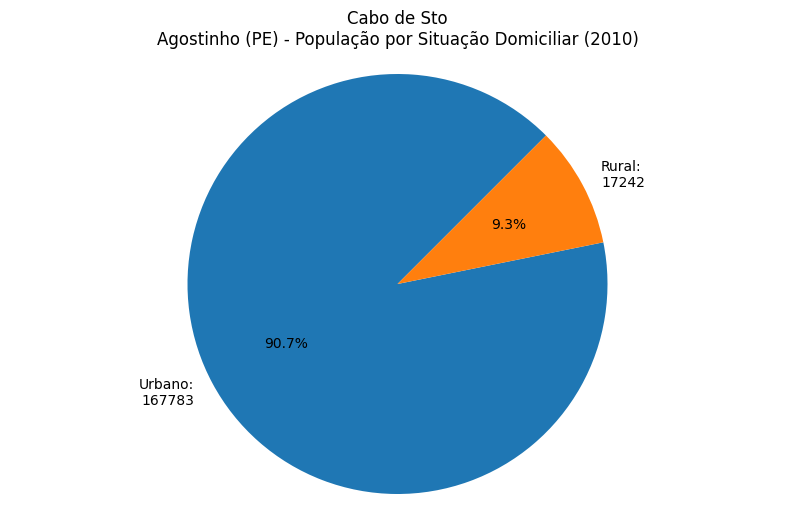

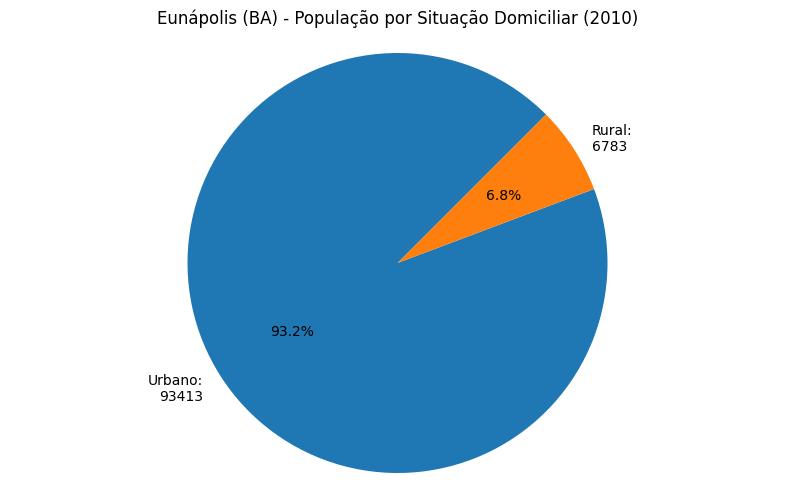

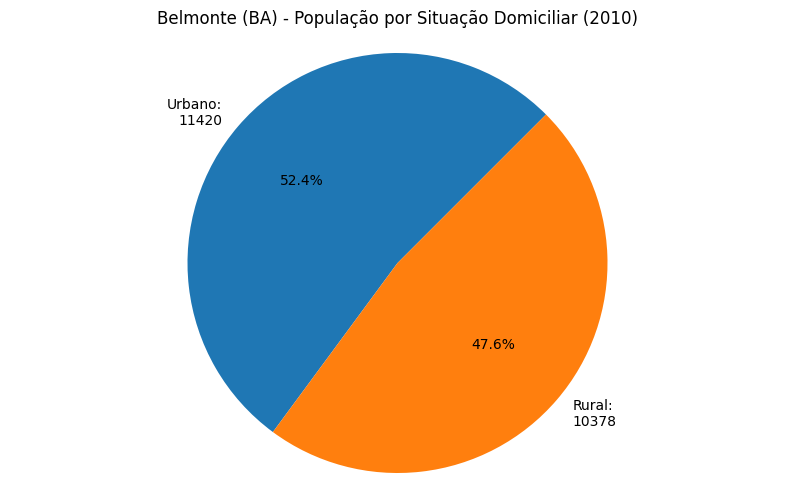

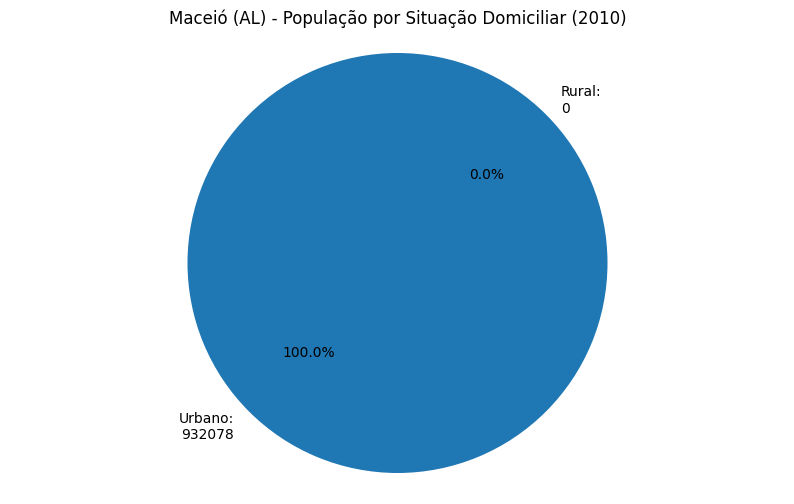

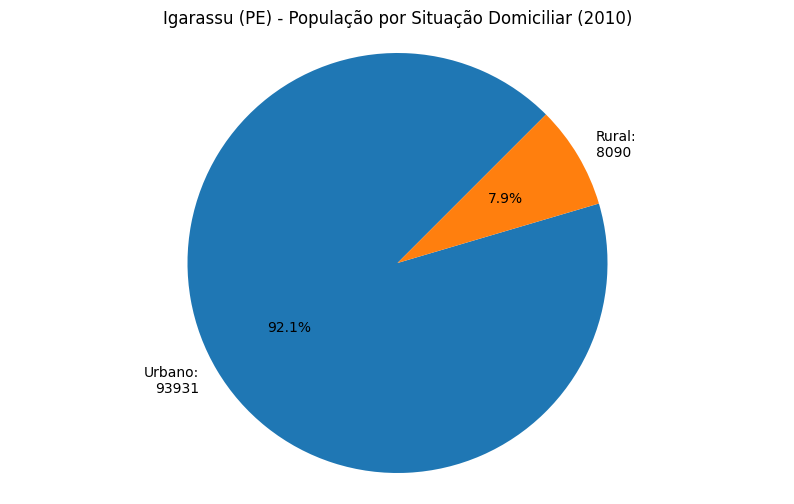

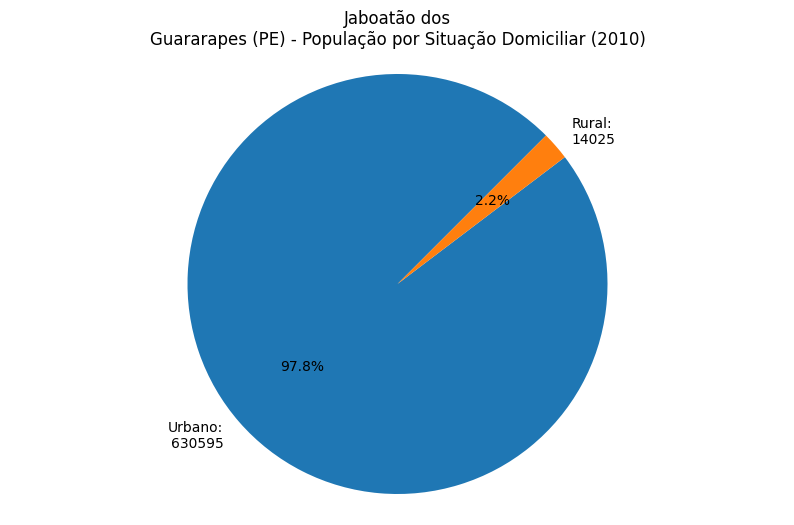

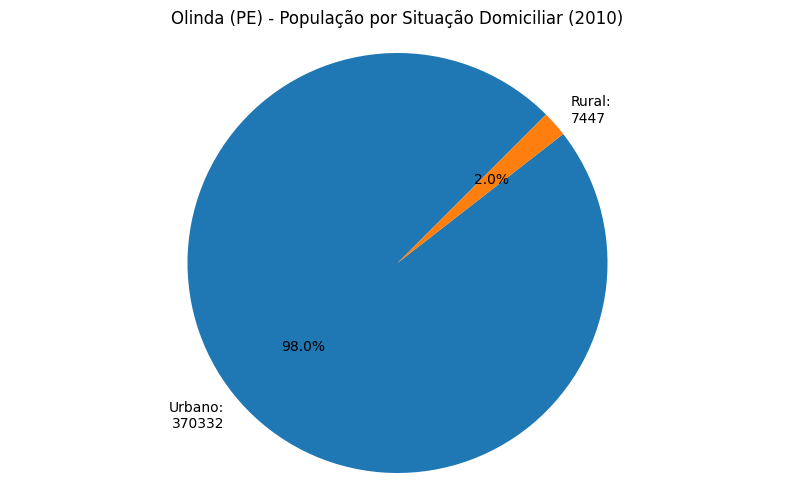

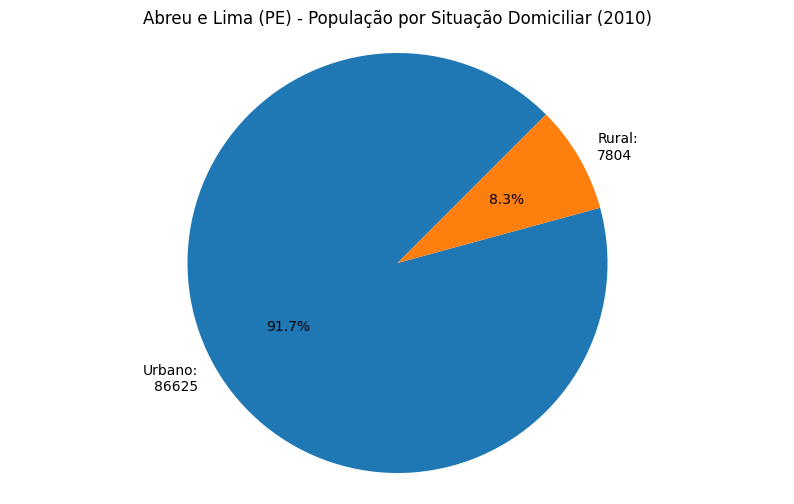

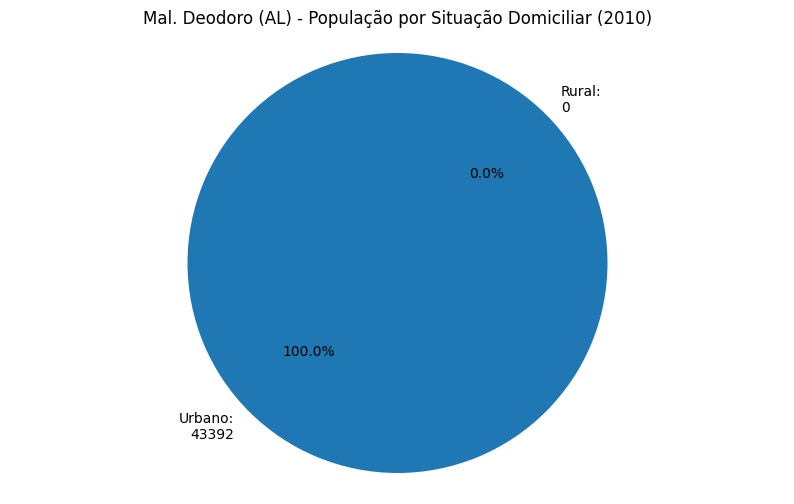

In [ ]:
# Filtrando df e montando pop_situ_domic_df para gráfico
df = DF_População_Municipios[[
                             'nome_municipio',
                             'Cor', 'Sexo', 'Situação de Domicílio',
                             'População 2010'
                              ]]

df = df[(df['Sexo'] == 'Total Sexo') & (df['Cor'] == 'Total Cor') & ((df['Situação de Domicílio'] == 'Urbano') | (df['Situação de Domicílio'] == 'Rural'))  ]
df.drop(['Sexo', 'Cor'], axis = 1, inplace = True )
df['População 2010'] = df['População 2010'].replace('-', 0)

# Loop de criação dos pie charts para pop_situ_domic_df
set_munic = set(df['nome_municipio'].tolist())

# replace the values in the 'nome_municipio' column
df['nome_municipio'] = df['nome_municipio'].replace(X_labels)
# Transforma object em int dtype
df['População 2010'] = df['População 2010'].apply(lambda x: pd.to_numeric(x, errors='coerce'))

# Loop de criação dos pie charts para pop_cor_df
set_munic = set(df['nome_municipio'].tolist())

Errors_list.clear()

for municipio in set_munic:
    try:
        pop_sexo_df = df[df['nome_municipio'] == municipio].pivot(index='nome_municipio', columns='Situação de Domicílio', values='População 2010')
        homem_pop = pop_sexo_df['Urbano'][0]
        mulher_pop = pop_sexo_df['Rural'][0]
    except:
        print(f'{municipio} pie chart failed. Added to Errors_list')
    else:
        labels = [f'Urbano:\n{pop_sexo_df["Urbano"][0]}', f'Rural:\n{pop_sexo_df["Rural"][0]}']
        sizes = [homem_pop, mulher_pop]
        
        fig1, ax1 = plt.subplots()
        ax1.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=45)
        ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
        plt.title(f"{municipio} - População por Situação Domiciliar (2010)")
        
        save_graph('Pie_Pop por Situação Domiciliar 2010', municipio)

        plt.show()